NameError: name 'fontprop' is not defined

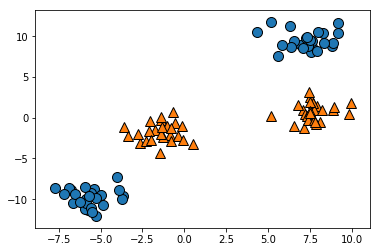

In [8]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC


X,y = make_blobs(centers=4,random_state=8)
y = y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성  0",fontproperties=fontprop)
plt.ylabel("특성  1",fontproperties=fontprop)


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

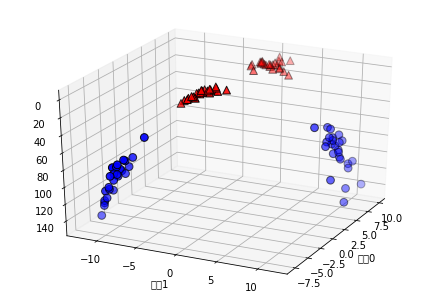

In [6]:
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()

ax = Axes3D(figure,elev=-152,azim=-26)
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap = mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap = mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1"**2)


C:\ProgramData\Anaconda3\envs\mypy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


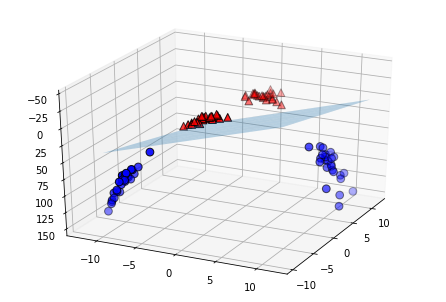

In [12]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min() -2,X_new[:,0].max() +2,50)
yy = np.linspace(X_new[:,0].min() -2,X_new[:,0].max() +2,50)
                 
XX,YY = np.meshgrid(xx,yy)
ZZ=(coef[0]*XX +coef[1]*YY + intercept) /-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2,s=60,edgecolor='k')                 

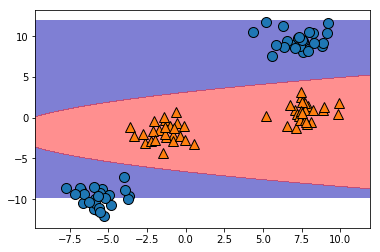

In [16]:
ZZ= YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

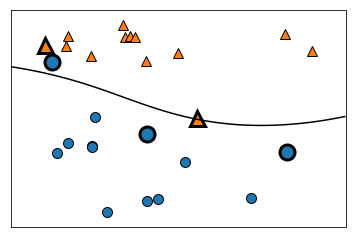

In [22]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

sv=svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)

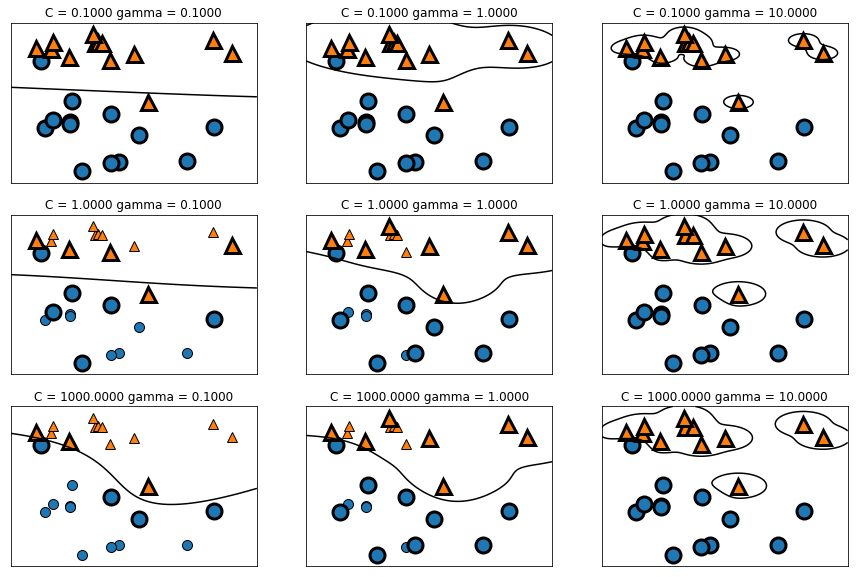

In [26]:
fig,axes = plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
        


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(
cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

1.0
0.6293706293706294


C:\ProgramData\Anaconda3\envs\mypy\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


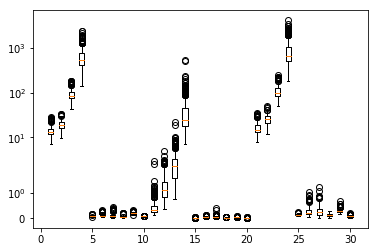

In [33]:
plt.boxplot(X_train,manage_xticks=False)
plt.yscale("symlog")